**Objective** :To predict Click Through Rate for email campaigns

In [2]:
#Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data Collection
pd.options.display.max_columns = 110
df_train = pd.read_csv(r'C:\Users\pv20v\Desktop\project\train_F3fUq2S.csv')
display(df_train.head())
df_test = pd.read_csv(r'C:\Users\pv20v\Desktop\project\test_Bk2wfZ3.csv')
display(df_test.head())

**Exploratory Data Analysis**



In [ ]:
#Data Preprocessing
#check the number of rows and columns in training set
df_train.info()
df_train.shape


Checking for missing values in Dataset

In [ ]:
#checking for nullvalues
df_train.isnull().sum()

No null values in training set

Converting Categorical data into numerical data









In [ ]:
from sklearn  import preprocessing
df_train['times_of_day'].unique()
sns.countplot(df_train['times_of_day'],order=df_train['times_of_day'].value_counts().index[::-1])

c:\Users\pv20v\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='times_of_day', ylabel='count'>

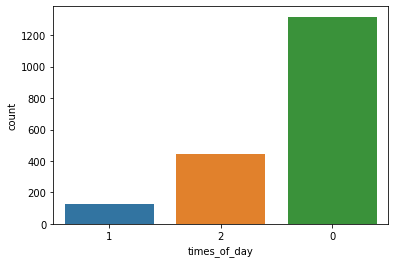

In [6]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()  
# Encode labels in column 'times_of_day'.
df_train['times_of_day']= label_encoder.fit_transform(df_train['times_of_day'])
df_train['times_of_day'].unique()
sns.countplot(df_train['times_of_day'],order=df_train['times_of_day'].value_counts().index[::-1])

Data Cleaning

In [45]:
# Checking for unique values of few columns
df_train['is_timer'].unique()

array([0], dtype=int64)

In [7]:
#drop the column 'is_timer
df_train.drop('is_timer',axis=1,inplace=True)

In [9]:
#Drop the column campaign id 
df_train.drop('campaign_id',axis=1,inplace=True)

In [10]:
#Checking for outliers in the feature 'is_price'
df_train['is_price'].unique()
df_train['is_price'].value_counts()

0        1875
5499        5
8000        2
5000        2
4999        1
1399        1
1000        1
14999       1
Name: is_price, dtype: int64

In [10]:
#Drop the column 'is_price'
df_train.drop('is_price',axis=1,inplace=True)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sender              1888 non-null   int64  
 1   subject_len         1888 non-null   int64  
 2   body_len            1888 non-null   int64  
 3   mean_paragraph_len  1888 non-null   int64  
 4   day_of_week         1888 non-null   int64  
 5   is_weekend          1888 non-null   int64  
 6   times_of_day        1888 non-null   int32  
 7   category            1888 non-null   int64  
 8   product             1888 non-null   int64  
 9   no_of_CTA           1888 non-null   int64  
 10  mean_CTA_len        1888 non-null   int64  
 11  is_image            1888 non-null   int64  
 12  is_personalised     1888 non-null   int64  
 13  is_quote            1888 non-null   int64  
 14  is_emoticons        1888 non-null   int64  
 15  is_discount         1888 non-null   int64  
 16  is_urg

**Univariate Analysis**

In [11]:
#mean,median,standard deviation,skewness,kurtosis
#We define a function to implement Univariate Analysis.
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (5*size,3), dpi = 50)
  plt.subplot(121)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=False)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 10)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

In [14]:
#Assigning the train numerical features.
Numerical_features_train = df_train.select_dtypes(include= ['int64','float'])
Numerical_features_train.columns


Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [ ]:
#Checking the distribution of all independent numerical variables.
for i in Numerical_features_train:
  UVA_KDE(df_train,[i])

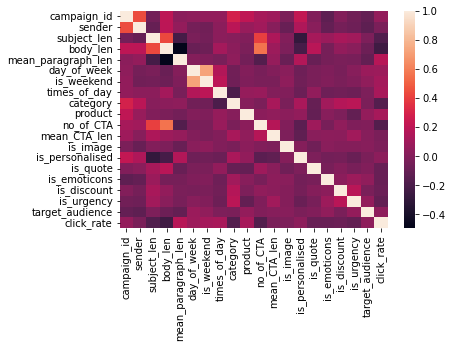

In [14]:
#Correlation Heatmap
sns.heatmap(df_train.corr())
plt.savefig("Plotting_Correlation_HeatMap.jpg")

Analysing Guassian Distributions:Removing the Outliers

In [19]:
Numerical_features_train.drop(['click_rate','is_urgency','is_weekend','is_personalised','is_emoticons','is_discount'],axis =1,inplace=True )

In [ ]:
Numerical_features_train.info()

In [20]:
#Outlier treatment of train dataset:

df1 = df_train.copy()

features1 = df_train.describe().columns.drop(Numerical_features_train)

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = (Q3+(1.5*IQR))
    lower_limit = (Q1-(1.5*IQR))
    df1[i] = np.where(df1[i]> upper_limit, upper_limit,
                        np.where(df1[i]< lower_limit, lower_limit,
                          df1[i]))
    df1 = df1.reset_index(drop=True)
display(df1.head())

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,click_rate
0,3,76,10439,39,5,0.0,2.0,6,26,3,29,0,0.0,0,0.0,0.0,0.0,14,0.080854
1,3,54,2570,256,5,0.0,1.0,2,11,0,22,0,0.0,0,0.0,0.0,0.0,10,0.080854
2,3,59,12801,16,5,0.0,2.0,2,11,3,23,1,0.0,1,0.0,0.0,0.0,16,0.002769
3,3,74,11037,30,4,0.0,0.0,15,9,4,24,0,0.0,0,0.0,0.0,0.0,10,0.010868
4,3,80,10011,27,5,0.0,2.0,6,26,3,31,0,0.0,1,0.0,0.0,0.0,14,0.080854


In [22]:
df_test.drop('campaign_id', axis=1, inplace=True)
df_test['times_of_day']= label_encoder.fit_transform(df_test['times_of_day'])  
df_test.drop('is_timer', axis=1, inplace=True)
df_test.drop('is_price', axis=1, inplace=True)

In [23]:
Numerical_features_test = df_test.select_dtypes(include= ['int64','float'])
Numerical_features_test.columns
Numerical_features_test.drop(['is_urgency','is_weekend','is_personalised','is_emoticons','is_discount'],axis =1,inplace=True )

In [25]:
df2 = df_test.copy()

features2 = df_test.describe().columns.drop(Numerical_features_test)

for i in features2:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = (Q3+(1.5*IQR))
    lower_limit = (Q1-(1.5*IQR))
    df2[i] = np.where(df2[i]> upper_limit, upper_limit,
                        np.where(df2[i]< lower_limit, lower_limit,
                          df2[i]))
    df2 = df2.reset_index(drop=True)
display(df2.head())

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience
0,3,61,12871,11,6,0.0,2.0,6,26,3,37,1,0.0,0,0.0,0.0,0.0,14
1,3,54,2569,256,5,0.0,1.0,2,11,0,22,0,0.0,0,0.0,0.0,0.0,10
2,3,88,1473,78,4,0.0,0.0,2,11,0,22,1,0.0,1,0.0,0.0,0.0,10
3,3,88,1473,78,3,0.0,0.0,2,11,0,22,1,0.0,1,0.0,0.0,0.0,10
4,3,78,9020,29,3,0.0,2.0,6,26,2,40,0,0.0,0,0.0,0.0,0.0,14


In [26]:
train = df1.copy()
test= df2.copy()

Splitting Dataset

Train set includes the target variable' click_rate' and objective is to  predict the click_rate of an email campaign in the test set.

In [27]:
x_train = train.drop("click_rate",axis=1)
y_train = train["click_rate"]

In [ ]:
y_train.info()

In [28]:
x_test = test

In [ ]:
x_test.info()

Model Building and training


In [29]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [30]:
model1 = CatBoostRegressor()
model1.fit(x_train,y_train)
train_pred = model1.predict(x_train)
train_score_r2 = r2_score((train_pred), (y_train))

Learning rate set to 0.045268
0:	learn: 0.0272450	total: 181ms	remaining: 3m
1:	learn: 0.0269620	total: 188ms	remaining: 1m 33s
2:	learn: 0.0266742	total: 195ms	remaining: 1m 4s
3:	learn: 0.0263983	total: 201ms	remaining: 50s
4:	learn: 0.0261227	total: 205ms	remaining: 40.9s
5:	learn: 0.0258736	total: 209ms	remaining: 34.7s
6:	learn: 0.0256158	total: 214ms	remaining: 30.3s
7:	learn: 0.0253592	total: 216ms	remaining: 26.8s
8:	learn: 0.0251510	total: 219ms	remaining: 24.1s
9:	learn: 0.0249247	total: 221ms	remaining: 21.9s
10:	learn: 0.0247292	total: 224ms	remaining: 20.2s
11:	learn: 0.0245322	total: 226ms	remaining: 18.6s
12:	learn: 0.0243483	total: 230ms	remaining: 17.5s
13:	learn: 0.0242134	total: 233ms	remaining: 16.4s
14:	learn: 0.0240472	total: 235ms	remaining: 15.4s
15:	learn: 0.0238669	total: 237ms	remaining: 14.6s
16:	learn: 0.0236911	total: 239ms	remaining: 13.8s
17:	learn: 0.0235139	total: 241ms	remaining: 13.2s
18:	learn: 0.0233492	total: 245ms	remaining: 12.6s
19:	learn: 0.02

In [31]:
test_pred = model1.predict(x_test)
print(test_pred)

[ 3.27943060e-02  7.95392320e-02  7.46123658e-02  7.39490870e-02
  7.45451873e-02  2.08747849e-02  1.05106416e-02  1.25042203e-02
  1.47242356e-03  2.25425292e-02  1.87388102e-02  8.47898468e-03
  7.54737183e-03  1.39826591e-02  8.40648144e-03  1.18276685e-02
  7.47805139e-03  1.46417471e-02  1.32865104e-02  2.90947824e-02
  2.12027690e-02  6.54267632e-03  1.02190342e-02  1.22861318e-02
  4.16064650e-03  1.35687755e-03  6.18606372e-02  5.73568915e-03
  3.63903835e-02  1.63866476e-02  1.18679959e-02  4.10798430e-02
 -3.23728986e-03  5.73445217e-02  2.05969273e-02  7.93369288e-03
  1.53092420e-04  1.81576917e-03  3.25456526e-03  3.02889290e-02
  1.09356339e-02  2.04828230e-02  5.63151810e-03  5.73515130e-02
  6.12616221e-02  7.73764167e-03  3.19973900e-02  1.09885478e-02
  1.76622381e-02  1.75032479e-02  1.52352140e-02  1.33421592e-02
  9.48891176e-03  1.13015391e-02  4.01250418e-03  9.37594568e-03
  1.93057009e-02  1.22988535e-02  3.46212762e-03  3.70478152e-03
  5.71237013e-02  6.22908

In [34]:
test_score_r2 = r2_score((test_pred), (y_train.head(762)))
print(test_score_r2)

-1.7049767393160447


In [35]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
reg = LinearRegression()
rfregressor = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)

In [37]:
import xgboost
xgregressor=xgboost.XGBRegressor()
classifier = xgboost.XGBRegressor()

In [38]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [39]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xgregressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'r2',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(x_train,y_train)

In [ ]:
random_cv.best_estimator_

XGBRegressor(max_depth=2)

In [ ]:
regressor=xgboost.XGBRegressor(max_depth=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tr_x_train = scaler.fit_transform(x_train)

In [ ]:
regressor.fit(x_train,y_train)

[21:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=2)

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred)

In [ ]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['RandomForestRegressor: ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor()]       
        ]

In [ ]:
xgb  =XGBRegressor(max_depth=2)
xgb.fit(x_train,y_train)

[21:07:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=2)

Predicting Click Through Rate



In [ ]:
y_pred = xgb.predict(x_test)
print (y_pred)

Finding evaluation Metrics

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(x_train)
X_poly_test = poly.fit_transform(x_test)


In [ ]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(x_train,y_train)
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(x_train))
      curr_model_data["R2_Score_test"] = r2_score(y_pred,curr_model.predict(x_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(x_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_pred,curr_model.predict(x_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_pred,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_pred,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

NameError: ignored

In [ ]:
metrics_df1 = pd.DataFrame(model_data)
metrics_df1


""


Creating Submission file with predictions

In [ ]:
pred = pd.DataFrame(y_pred)
dataset = pd.concat([df_test["campaign_id"], pred], axis=1)
dataset.columns = ["campaign_id", "click_rate"]
dataset.to_csv(r'submission_file.csv', index=False)

In [ ]:
from google.colab import files
files.download("submission_file.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>